# Using Machine Learning Tools: Workshop 3

##**Chapter 1 – The Machine Learning landscape**

This is a modified version of the code accompanying Chapter 1 of
_Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2e_ by Aurelien Geron

--------------------------------------------------------------------

##**Setup and data inspection**

First check that you have the required Python libraries. Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.If you are having issues, you may want to specifically try Python 3.10.

Once that is done, inspect the data as per the below. Note that we are using the Pandas library for much of this data manipulation, as it is very flexible for data of different types and contains some very useful manipulation routines. However, once we have looked at our data, fixed any problems and selected the numerical data that we want (including binary data) then we normally extract this into Numpy arrays, as these are more useful/compatible with the machine learning libraries.



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.linear_model

# Some useful commands to save us the hassle of having tiny writing
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Load the data using a pandas function
housing = pd.read_csv("workshop3_2024.csv")

**Data Inspection** - **Garbage - In, Garbage Out**

The relevance of working with **good** data

As always, the first job in any data analysis project is just having a look at the raw data to get an idea of what we are looking at, whether this simply be kinds of data we have (numerical, categorical) the ranges they occur over (are they tiny numbers, huge numbers) or variation (is there already a lot of variation in some of the values, or are they all the same).

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


The data contains information from the 1990 California census. This is available in [Geron's book](https://www.kaggle.com/datasets/camnugent/california-housing-prices) where you can see the description of each feature.

* **longitude**: A measure of how far west a house is; a higher value is farther west
* **latitude**: A measure of how far north a house is; a higher value is farther north
* **housingMedianAge**: Median age of a house within a block; a lower number is a newer building
* **totalRooms**: Total number of rooms within a block
* **totalBedrooms**: Total number of bedrooms within a block
* **population**: Total number of people residing within a block
* **households**: Total number of households, a group of people residing within a home unit, for a block
* **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
* **oceanProximity**: Location of the house w.r.t ocean/sea

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.648344,28.656928,537.870553,1425.379942,499.539680,3.870623,206855.816909
std,2.003532,3.200177,12.848021,421.385070,1132.583966,382.329753,1.899920,115395.615874
min,-124.350000,32.540000,1.000000,1.000000,-999.000000,1.000000,-0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,378.000000,400.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From your inspection, what issues do you notice? Pay attention to data types, the number of values, range of values etc.

##**Data cleaning and preprocessing**

You may have noticed that the `ocean_proximity` feature is categorical, not numerical. Although it is possible to use categorical data in regression, it is more difficult, so for now we will remove it from the DataFrame (hint: use the drop() function). Also, try doing this in two ways: (i) creating a new dataframe where it is removed, and (ii) modifying the existing dataframe (hint: use the inplace option).  It is good to know how to do these operations in different ways.

We will also try and do some data cleaning and preprocessing by removing any missing values associated with a feature (a simple approach). We can do this by removing columns or rows from the dataframe that correspond to missing values. You can filter your dataframe using functions like:
`iloc` (integer position-based) and `loc` (label-based).

Use these hints to try and write code to remove the feature `ocean_proximity` as well as any rows or columns associated with missing data. If you like, you can use ChatGPT to help you.



In [5]:
housing.drop(columns=['ocean_proximity'], inplace=True)

In [6]:
housing.dropna(inplace=True)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 1.6+ MB


##**Further exploration of missing/invalid values using basic data visualisation**

Now that we have explored a very simple way of dealing with missing values, let's explore some other approaches to deal with data issues. Look for evidence of other missing or invalid values in the remaining features by looking carefully at the data description and different data visualisations - in particular, boxplots, sorted values and histograms (see below).  Although it is not possible to detect all errors and corruptions in large datasets, some of the most problematic ones can be identified through this type of checking.

Use the code below and examine the plots to identify issues with your data.

If you finish this quickly, you can also use ChatGPT to help them come up with and implement additional visualisations.

**Boxplots**


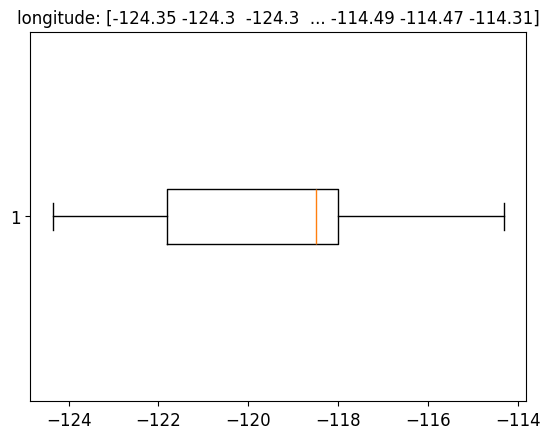

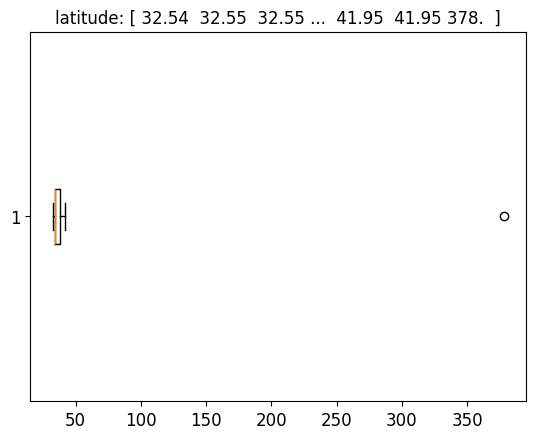

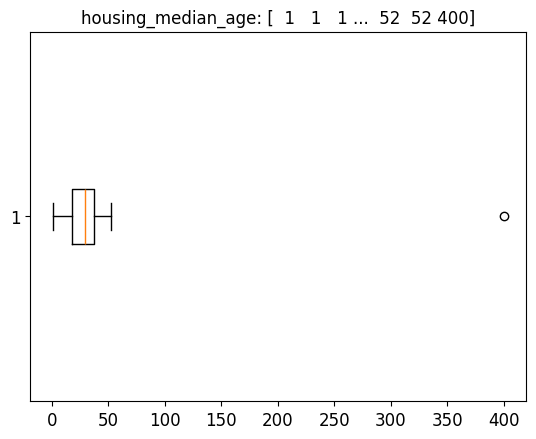

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

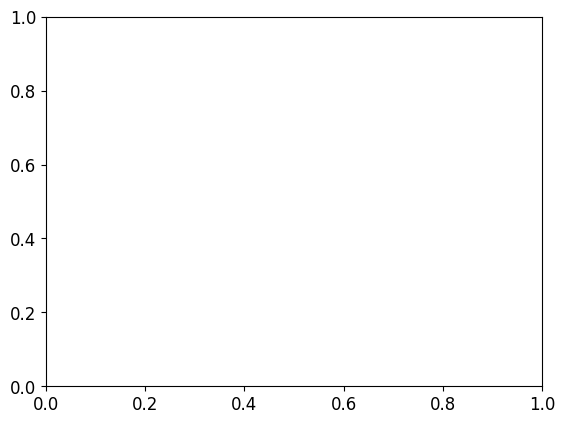

In [8]:
# Visualise using boxplots
for feat in housing.columns:
    plt.boxplot(housing[feat],vert=False)
    plt.title(f'{feat}: {np.sort(housing.loc[:,feat])}')
    plt.show()

longitude: [-124.35 -124.3  -124.3  ... -114.49 -114.47 -114.31]


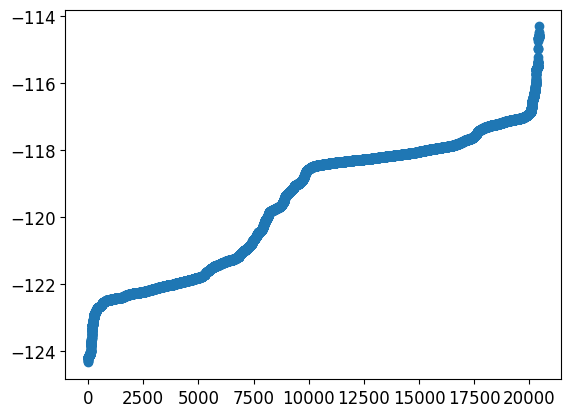

latitude: [ 32.54  32.55  32.55 ...  41.95  41.95 378.  ]


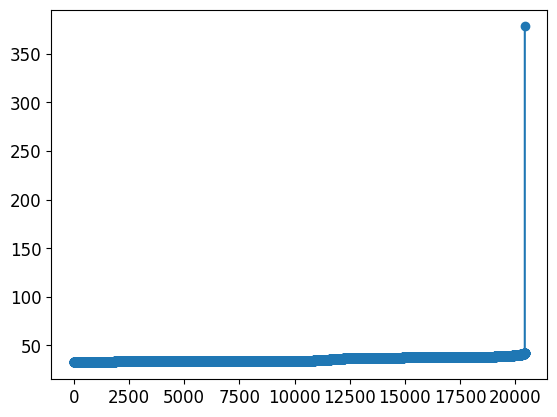

housing_median_age: [  1   1   1 ...  52  52 400]


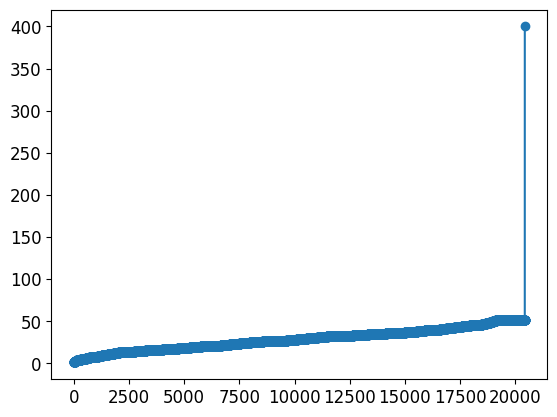

total_rooms: ['100' '1000' '1000' ... '??' '??' '??']


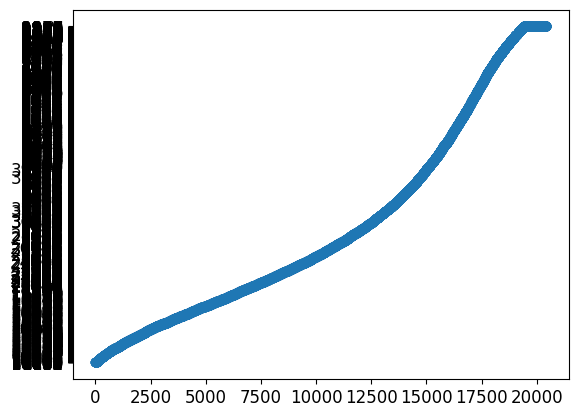

total_bedrooms: [1.000e+00 2.000e+00 2.000e+00 ... 5.471e+03 6.210e+03 6.445e+03]


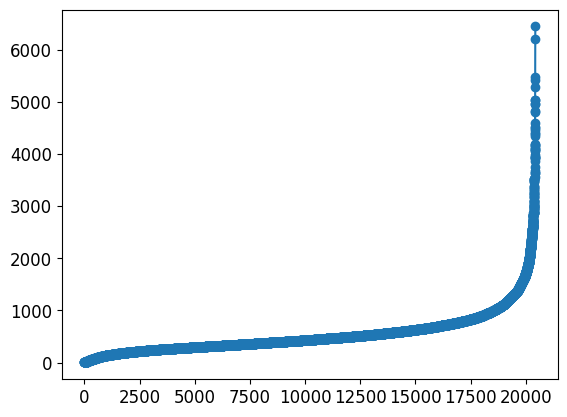

population: [ -999     3     5 ... 16305 28566 35682]


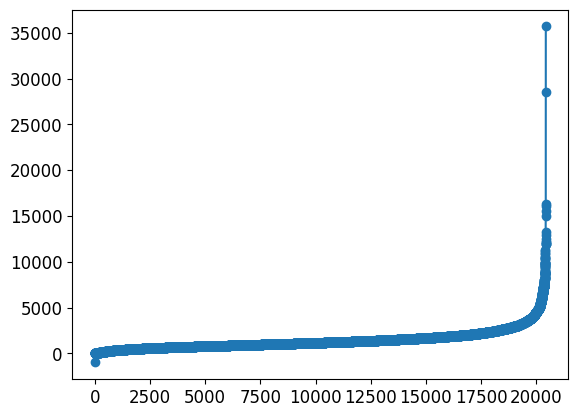

households: [   1    2    2 ... 5189 5358 6082]


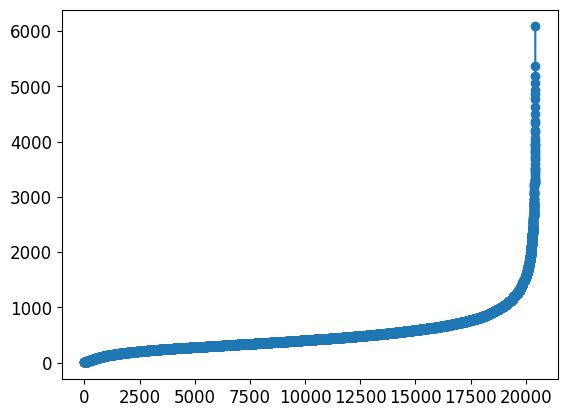

median_income: [-0.4999  0.4999  0.4999 ... 15.0001 15.0001 15.0001]


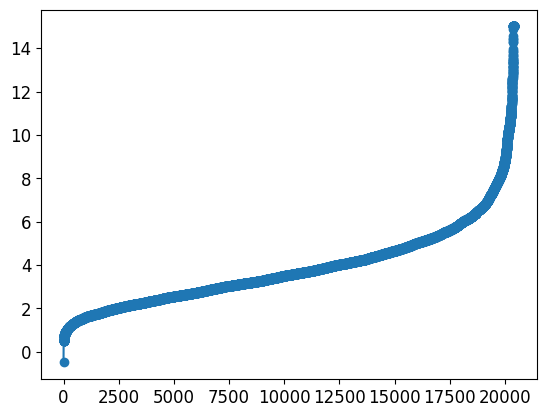

median_house_value: [ 14999  14999  14999 ... 500001 500001 500001]


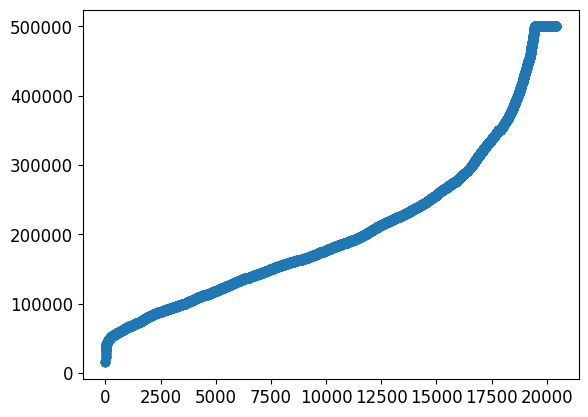

In [9]:
# Visualise using sorted values
for feat in housing.columns:
    print(f'{feat}: {np.sort(housing.loc[:,feat])}')
    # We show the sorted values of each feature
    plt.plot(np.sort(housing.loc[:,feat]),'-o')
    plt.show()

**Viewing as sorted data**

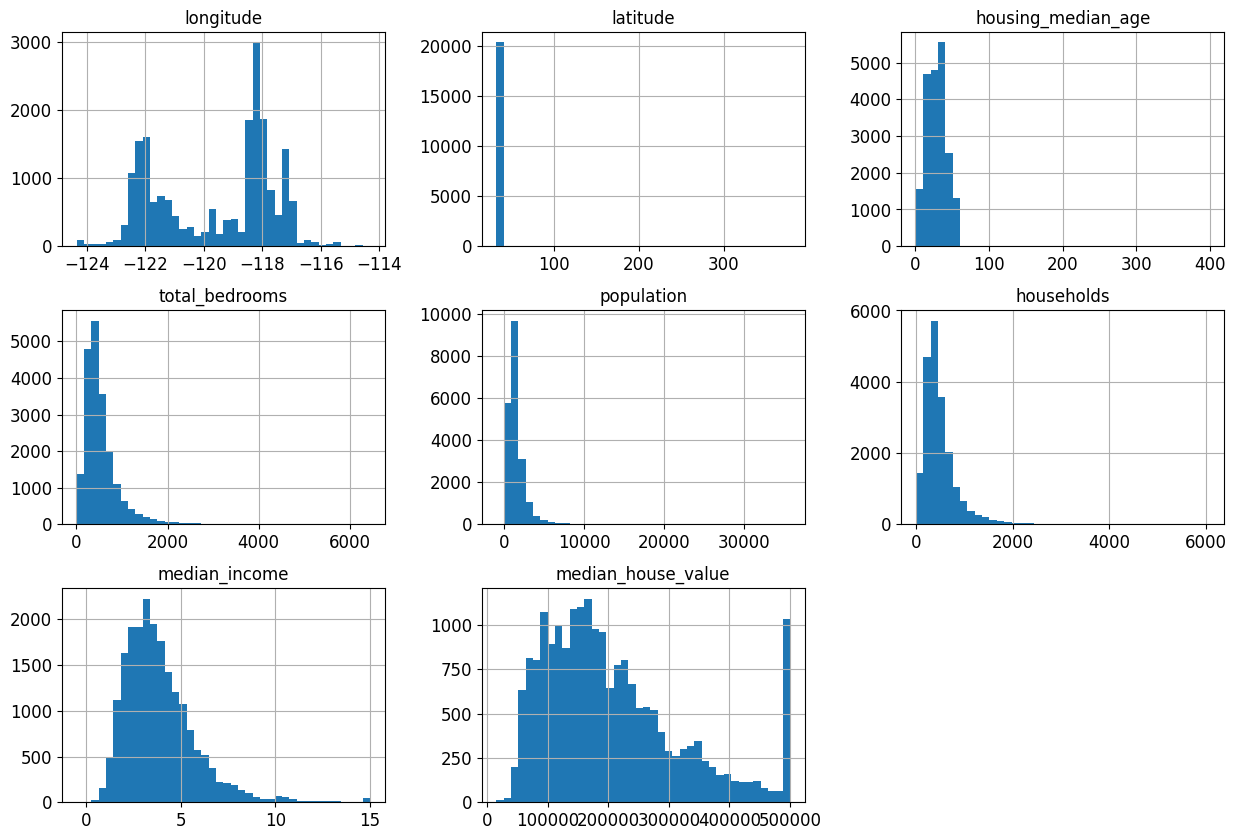

In [10]:
# Visualise using histograms
dummy = housing.hist(bins=40, figsize=(15, 10))

**Histograms**

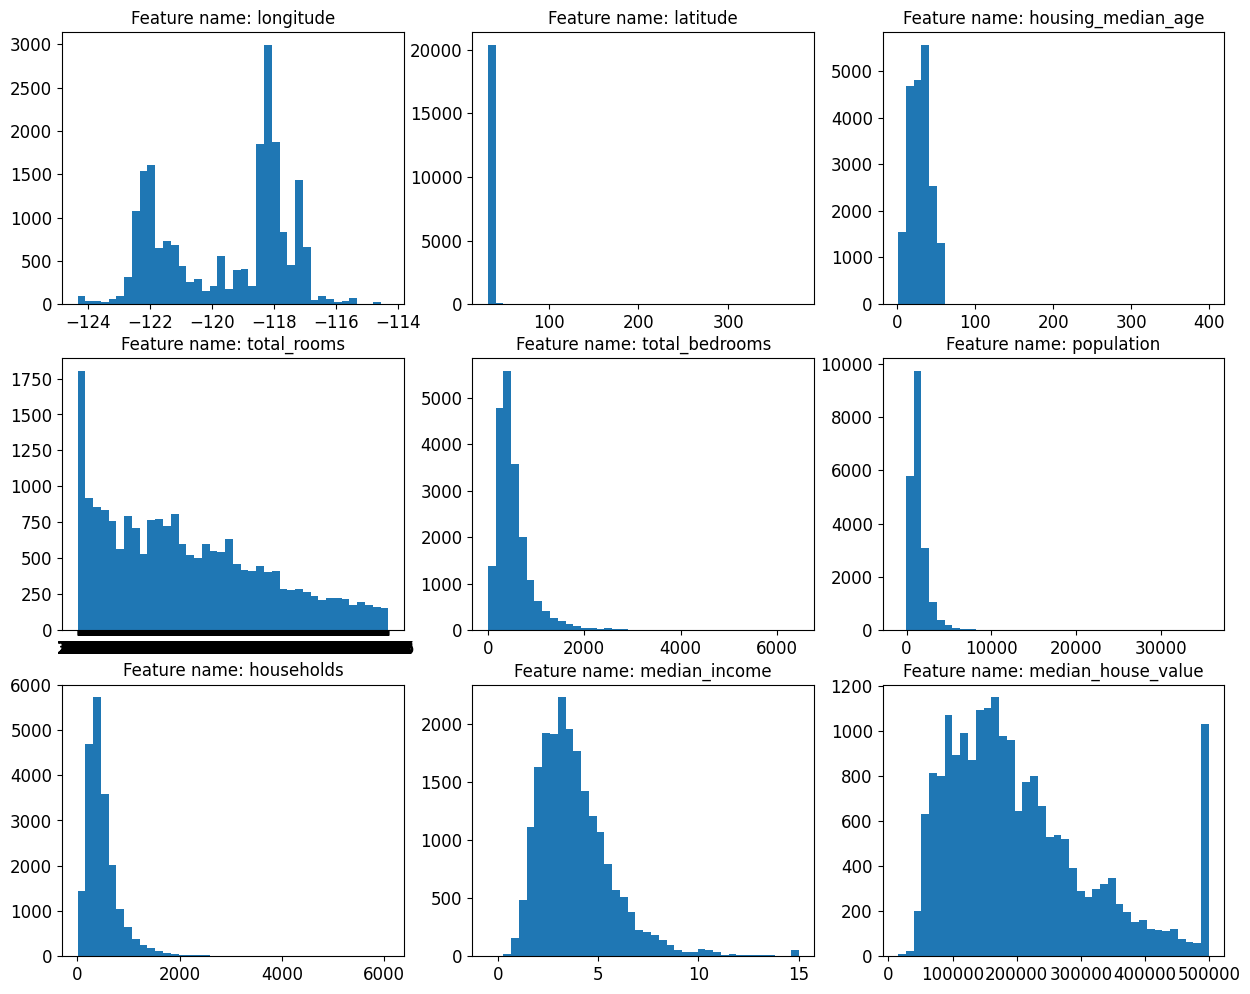

In [11]:
# Alternative using matplotlib
plt.figure(figsize=(15, 12))
nfeat = housing.shape[1]
# Select the number of columns in our main plot
ncol = 3
nrow = int(np.ceil(nfeat/ncol))
for n in range(nfeat):
    plt.subplot(nrow,ncol,n+1)
    plt.hist(housing.iloc[:,n],bins=40)
    plt.title(f'Feature name: {housing.columns[n]}')
plt.show()

In [12]:
# After reviewing these values you can aware that some of them either have strange behaviours or are errors.

# Checking data, we identify a 'potential' wrong value of latitude, which value is over 350. We can check this sample.
housing.loc[housing['latitude'] > 350,:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
220,-122.21,378.0,39,2003,500.0,1109,464,3.0682,156500


In [13]:
# We can replace this value for nan
housing.loc[housing['latitude'] > 350,'latitude'] = np.nan

# As we introduced a new nan value, we need to remove the entire row with the missing value
housing = housing.dropna()

**Matplot - any difference?**

Here is an alternative method to generate histograms, using matplotlib version. Do you see any difference?

In [14]:
# Let's load it from scratch again and have a look at what imputation looks like
housing = pd.read_csv("workshop3_2024.csv")

# Take a copy of the dataframe
# Note that this is not a true *deep* copy, as not all lower level structures are copied
# See copy.deepcopy for a true deep copy (though we don't need this now)
housing_copy = housing.copy()
housing_copy.drop(columns=['ocean_proximity'],inplace=True)
# We still have missing value issues (see row 10)
print(housing_copy['total_rooms'][8:12])

8     2555
9     3549
10      ??
11    3503
Name: total_rooms, dtype: object


In [21]:
# If we try to calculate the medians, it will stuff up sadly (nan ruins them)
# medians = np.median(housing_copy,axis=0)
# print(medians)

In [15]:
# Convert to numerical, then drop all problem rows (this is only one option for dealing with these)
housing_copy = housing_copy.apply(pd.to_numeric, errors="coerce")
na_version = housing_copy.dropna()

print(housing_copy[8:12])
print(na_version[8:12])
# We can now see the missing rows

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8     -122.26     37.84                  42       2555.0           665.0   
9     -122.25     37.84                  52       3549.0           707.0   
10    -122.26     37.85                  52          NaN           434.0   
11    -122.26     37.85                  52       3503.0           752.0   

    population  households  median_income  median_house_value  
8         1206         595         2.0804              226700  
9         1551         714         3.6912              261100  
10         910         402         3.2031              281500  
11        1504         734         3.2705              241800  
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8     -122.26     37.84                  42       2555.0           665.0   
9     -122.25     37.84                  52       3549.0           707.0   
11    -122.26     37.85                  52       3503.0           752.

#**More 'advanced' data handling**

Now that you have explored dealing with missing values and visualising this in a basic way, another way of dealing with missing data is by imputation ('filling' in missing data). This will be explored in the context of calculating the median (not necessarily the most accurate method), where we just replace all the missing values with the median value found in that column.


**Why would we want to go to all this effort to fill in a few missing values?**

The answer is that dropping rows that are not complete can result in a huge loss of data. For example, consider that there are 100 features that are taken from health records for each person in a dataset. Now imagine that the error rate of the person that types in the values (or, alternatively, the error rate of the measurements/questionnaire results) is 0.8%. If there were 400 people in the dataset and you only kept people with complete records (no errors or missing/illegal values) how many do you think would be left?  Here is some code to simulate this - run it several times to see what you get.

In [16]:
ns = 400   # don’t use np for number of people, as it hides the np that stands for numpy!

nf = 100   # number of features

errate = 0.008   # error rate

vals = np.random.rand(ns,nf)   # uniform random numbers in [0,1]

errs = vals<errate  # Is True for specified error rate

nerrs = np.sum(errs,axis=1)   # number of errors per subject

print(np.sum(nerrs==0)/ns*100)   # percentage of subjects with complete records (no errors)

45.5


**Imputation using the median value**

Use the below code to impute missing values using the median. If you finish quickly and time, you can also re-do the visualisation and see what differences this made.

In [17]:
# Estimate medians now that data is tidied up (though it would not change much)
medians = np.median(na_version, axis=0)  # You need to decide on the right axis to use
print(medians)

[-1.1849e+02  3.4260e+01  2.9000e+01  2.1260e+03  4.3500e+02  1.1660e+03
  4.1000e+02  3.5385e+00  1.8010e+05]


In [18]:
# Perform imputation using median values (it is critical that this is done _after_ tidying data up)
for n in range(housing_copy.shape[1]):
    housing_copy.iloc[:, n] = housing_copy.iloc[:, n].fillna(medians[n])

# Look for the Nan??
print(housing_copy[8:12])

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8     -122.26     37.84                  42       2555.0           665.0   
9     -122.25     37.84                  52       3549.0           707.0   
10    -122.26     37.85                  52       2126.0           434.0   
11    -122.26     37.85                  52       3503.0           752.0   

    population  households  median_income  median_house_value  
8         1206         595         2.0804              226700  
9         1551         714         3.6912              261100  
10         910         402         3.2031              281500  
11        1504         734         3.2705              241800  


In [20]:
# Load the data using a pandas function
housing = pd.read_csv("workshop3_2024.csv")

housing.drop(columns=['ocean_proximity'],inplace=True)
housing = housing.apply(pd.to_numeric, errors="coerce")
housing.dropna(inplace=True)

# An alternative way to do imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
housing_np = imputer.fit_transform(housing)
print(type(housing_np))

print("Total remaining NaNs:", np.isnan(housing_np).sum())

<class 'numpy.ndarray'>
Total remaining NaNs: 0


#**Extension: Modelling with linear regression**

Now that you have prepared your data appropriately, we will use it to train a linear regression model, using only the training data, as we saw in last week's workshop. Use the code below and try using the model to predict the house values in the test set, and compare to the actual values.

In [21]:
# Now we can split our data in y and X
y = housing_np[:,8] # target
X = housing_np[:,0:8] # features

In [22]:
# Now, we can split our dataset in train and test
from sklearn.model_selection import train_test_split

# Split using a ratio of 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [23]:
# Now  we can implement a linear regression model
from sklearn.linear_model import LinearRegression

# Create a model object
model = LinearRegression()
# Train a model
model.fit(X_train,y_train)

LinearRegression()

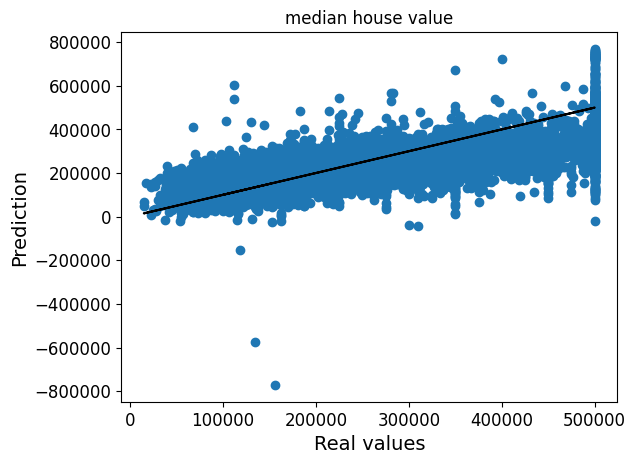

In [24]:
# We can do prediction in train set
pred_train = model.predict(X_train)

# We can compare with the real output
plt.scatter(y_train,pred_train)
plt.plot(y_train,y_train,'k')
plt.title("median house value")
plt.xlabel("Real values")
plt.ylabel("Prediction")
plt.show()

In [25]:
# We can do prediction in test set
pred_test = model.predict(X_test)

In [26]:
# Also, we can check the performance of our model
from sklearn.metrics import mean_squared_error

# Check the performance in train
print("The mean squared error in training is:", mean_squared_error(y_train,pred_train))

# Check the performance in test
print("The mean squared error in testing is:", mean_squared_error(y_test,pred_test))

The mean squared error in training is: 5680511527.40331
The mean squared error in testing is: 6013781837.470729


#**Extension: Further model training and evaluation**

Considering your analysis from previous plots, try to fix the wrong values using imputation or removing rows. Choose the best way to fix each case. After that, train your model again and predict in train and testing data. Compare the performance with the previous case.

How do these compare to the actual values? At this point, the idea is just to check that your model runs and produces a plausible result. If so, congratulations! But how do you know how to interpret the result? That is the topic we will move on to next week...